In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import statsmodels.api as sm

In [63]:

# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [64]:
data = pd.read_csv("T1.csv")

In [65]:

data = data[(data["Wind Speed (m/s)"] >= 0) & (data["LV ActivePower (kW)"] >= 0) & (data["Theoretical_Power_Curve (KWh)"]>=0) & (data["Wind Direction (°)"]>=0)]

# In this part we get rid of the values which under 0 because all the data must be greater than 0 or equal to 0

In [66]:
data.shape

(50473, 5)

In [67]:
# We should also look more closely at the dimensions of the dataset. 
print("There are:", data.shape[0], 'rows.')
print("There are:", data.shape[1], 'columns.')

There are: 50473 rows.
There are: 5 columns.


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50473 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50473 non-null  object 
 1   LV ActivePower (kW)            50473 non-null  float64
 2   Wind Speed (m/s)               50473 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50473 non-null  float64
 4   Wind Direction (°)             50473 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.3+ MB


In [69]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [74]:
data2 = data.drop('Date/Time', axis=1)

In [75]:
data2.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [76]:
data2.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50473.000000,50473.000000,50473.000000,50473.000000
mean,1309.161489,7.563317,1493.846082,123.648102
std,1312.463427,4.226509,1367.885865,93.446383
min,0.000000,0.000000,0.000000,0.000000
25%,52.740540,4.210382,163.084179,49.304878
50%,828.006714,7.111886,1067.161300,73.660377
75%,2484.364014,10.303410,2966.774233,201.684006
max,3618.732910,25.206011,3600.000000,359.997589


In [77]:
data2.dtypes

LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [78]:
data2.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

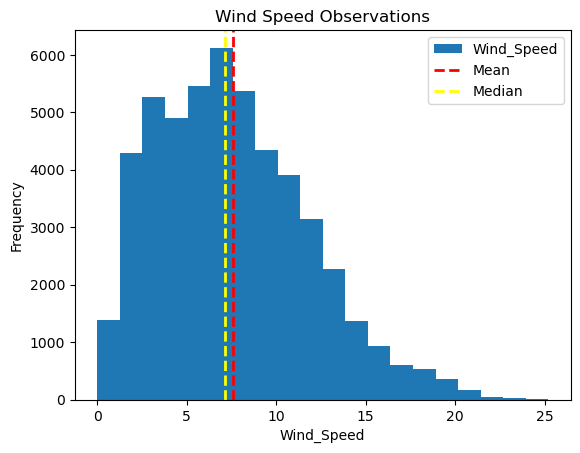

In [79]:
fig, ax = plt.subplots()
ax.hist(data["Wind Speed (m/s)"],label="Wind_Speed",bins=20)
ax.axvline(data2["Wind Speed (m/s)"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(data2["Wind Speed (m/s)"].median(), color='yellow', linestyle='dashed', linewidth=2, label='Median')
ax.set_xlabel("Wind_Speed")
ax.set_ylabel("Frequency")
ax.set_title("Wind Speed Observations")
ax.legend()
plt.show()

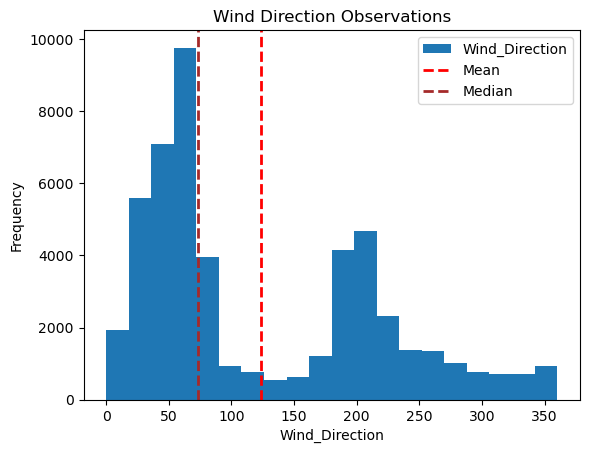

In [80]:
fig, ax = plt.subplots()
ax.hist(data["Wind Direction (°)"],label="Wind_Direction",bins=20)
ax.axvline(data2["Wind Direction (°)"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(data2["Wind Direction (°)"].median(), color='brown', linestyle='dashed', linewidth=2, label='Median')
ax.set_xlabel("Wind_Direction")
ax.set_ylabel("Frequency")
ax.set_title("Wind Direction Observations")
ax.legend()
plt.show()

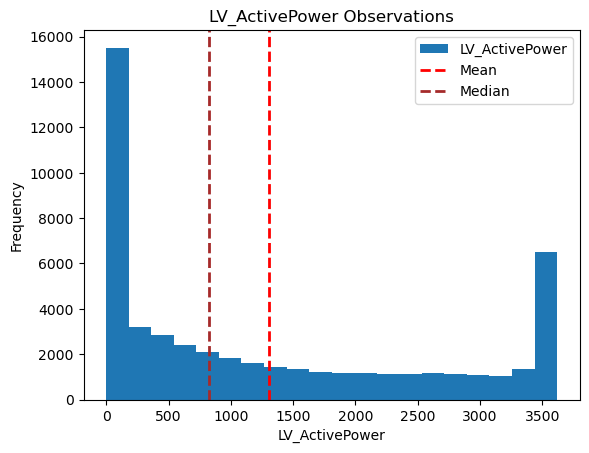

In [81]:
fig, ax = plt.subplots()
ax.hist(data["LV ActivePower (kW)"],label="LV_ActivePower",bins=20)
ax.axvline(data2["LV ActivePower (kW)"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(data2["LV ActivePower (kW)"].median(), color='brown', linestyle='dashed', linewidth=2, label='Median')
ax.set_xlabel("LV_ActivePower")
ax.set_ylabel("Frequency")
ax.set_title("LV_ActivePower Observations")
ax.legend()
plt.show()

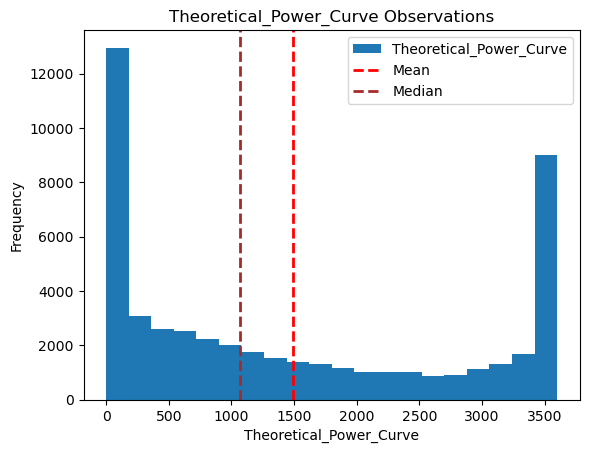

In [82]:
fig, ax = plt.subplots()
ax.hist(data["Theoretical_Power_Curve (KWh)"],label="Theoretical_Power_Curve",bins=20)
ax.axvline(data2["Theoretical_Power_Curve (KWh)"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(data2["Theoretical_Power_Curve (KWh)"].median(), color='brown', linestyle='dashed', linewidth=2, label='Median')
ax.set_xlabel("Theoretical_Power_Curve")
ax.set_ylabel("Frequency")
ax.set_title("Theoretical_Power_Curve Observations")
ax.legend()
plt.show()

In [140]:
data2.head(2)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113


In [145]:
data2["Wind Speed (m/s)"].mean()

7.563317040754185

In [142]:
import scipy.stats as stats
hypothesized_mean = 7
sample_size = len(data2["Wind Speed (m/s)"])  # Assuming 'charges' is your data
#Ho: Wind speed mean < 7
#H1 Wind speed mean >=7
# Calculate the t-statistic
t_statistic = (data2["Wind Speed (m/s)"].mean()- hypothesized_mean) / (data2["Wind Speed (m/s)"].std() / (sample_size**0.5))

# Calculate the p-value
degrees_of_freedom = sample_size - 1
p_value = stats.t.cdf(t_statistic, df=degrees_of_freedom)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 29.943365545154812
P-value: 1.0


T-statistic: This value represents the number of standard deviations the sample mean is from the hypothesized population mean
under the null hypothesis. In this case, the t-statistic is positive, indicating that the sample mean is greater
than the hypothesized mean.

Given the high p-value, you would not reject the null hypothesis. There is not enough evidence to conclude that the average
wind speed has fallen below 7 based on the provided data at a significance level of 0.05.

In [92]:
data2.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912678,0.949861,-0.062349
Wind Speed (m/s),0.912678,1.000000,0.944137,-0.076785
Theoretical_Power_Curve (KWh),0.949861,0.944137,1.000000,-0.098729
Wind Direction (°),-0.062349,-0.076785,-0.098729,1.000000


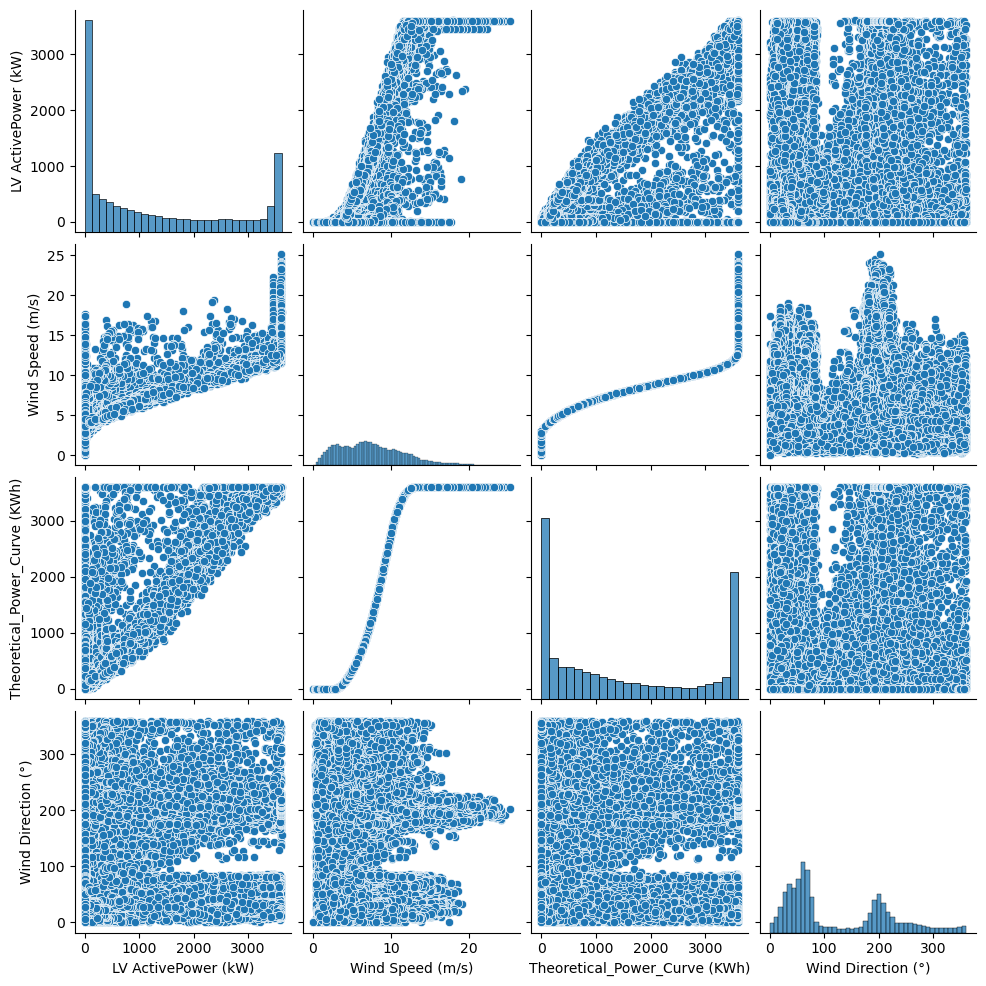

In [83]:
sns.pairplot(data2)
plt.show()

a given cell value represents the correlation that exists between two variables
on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.
Notice that some of the nice plots invite a line of best fit, such as Wind Spedd (m/s) vs LV ActivePower (kW) .

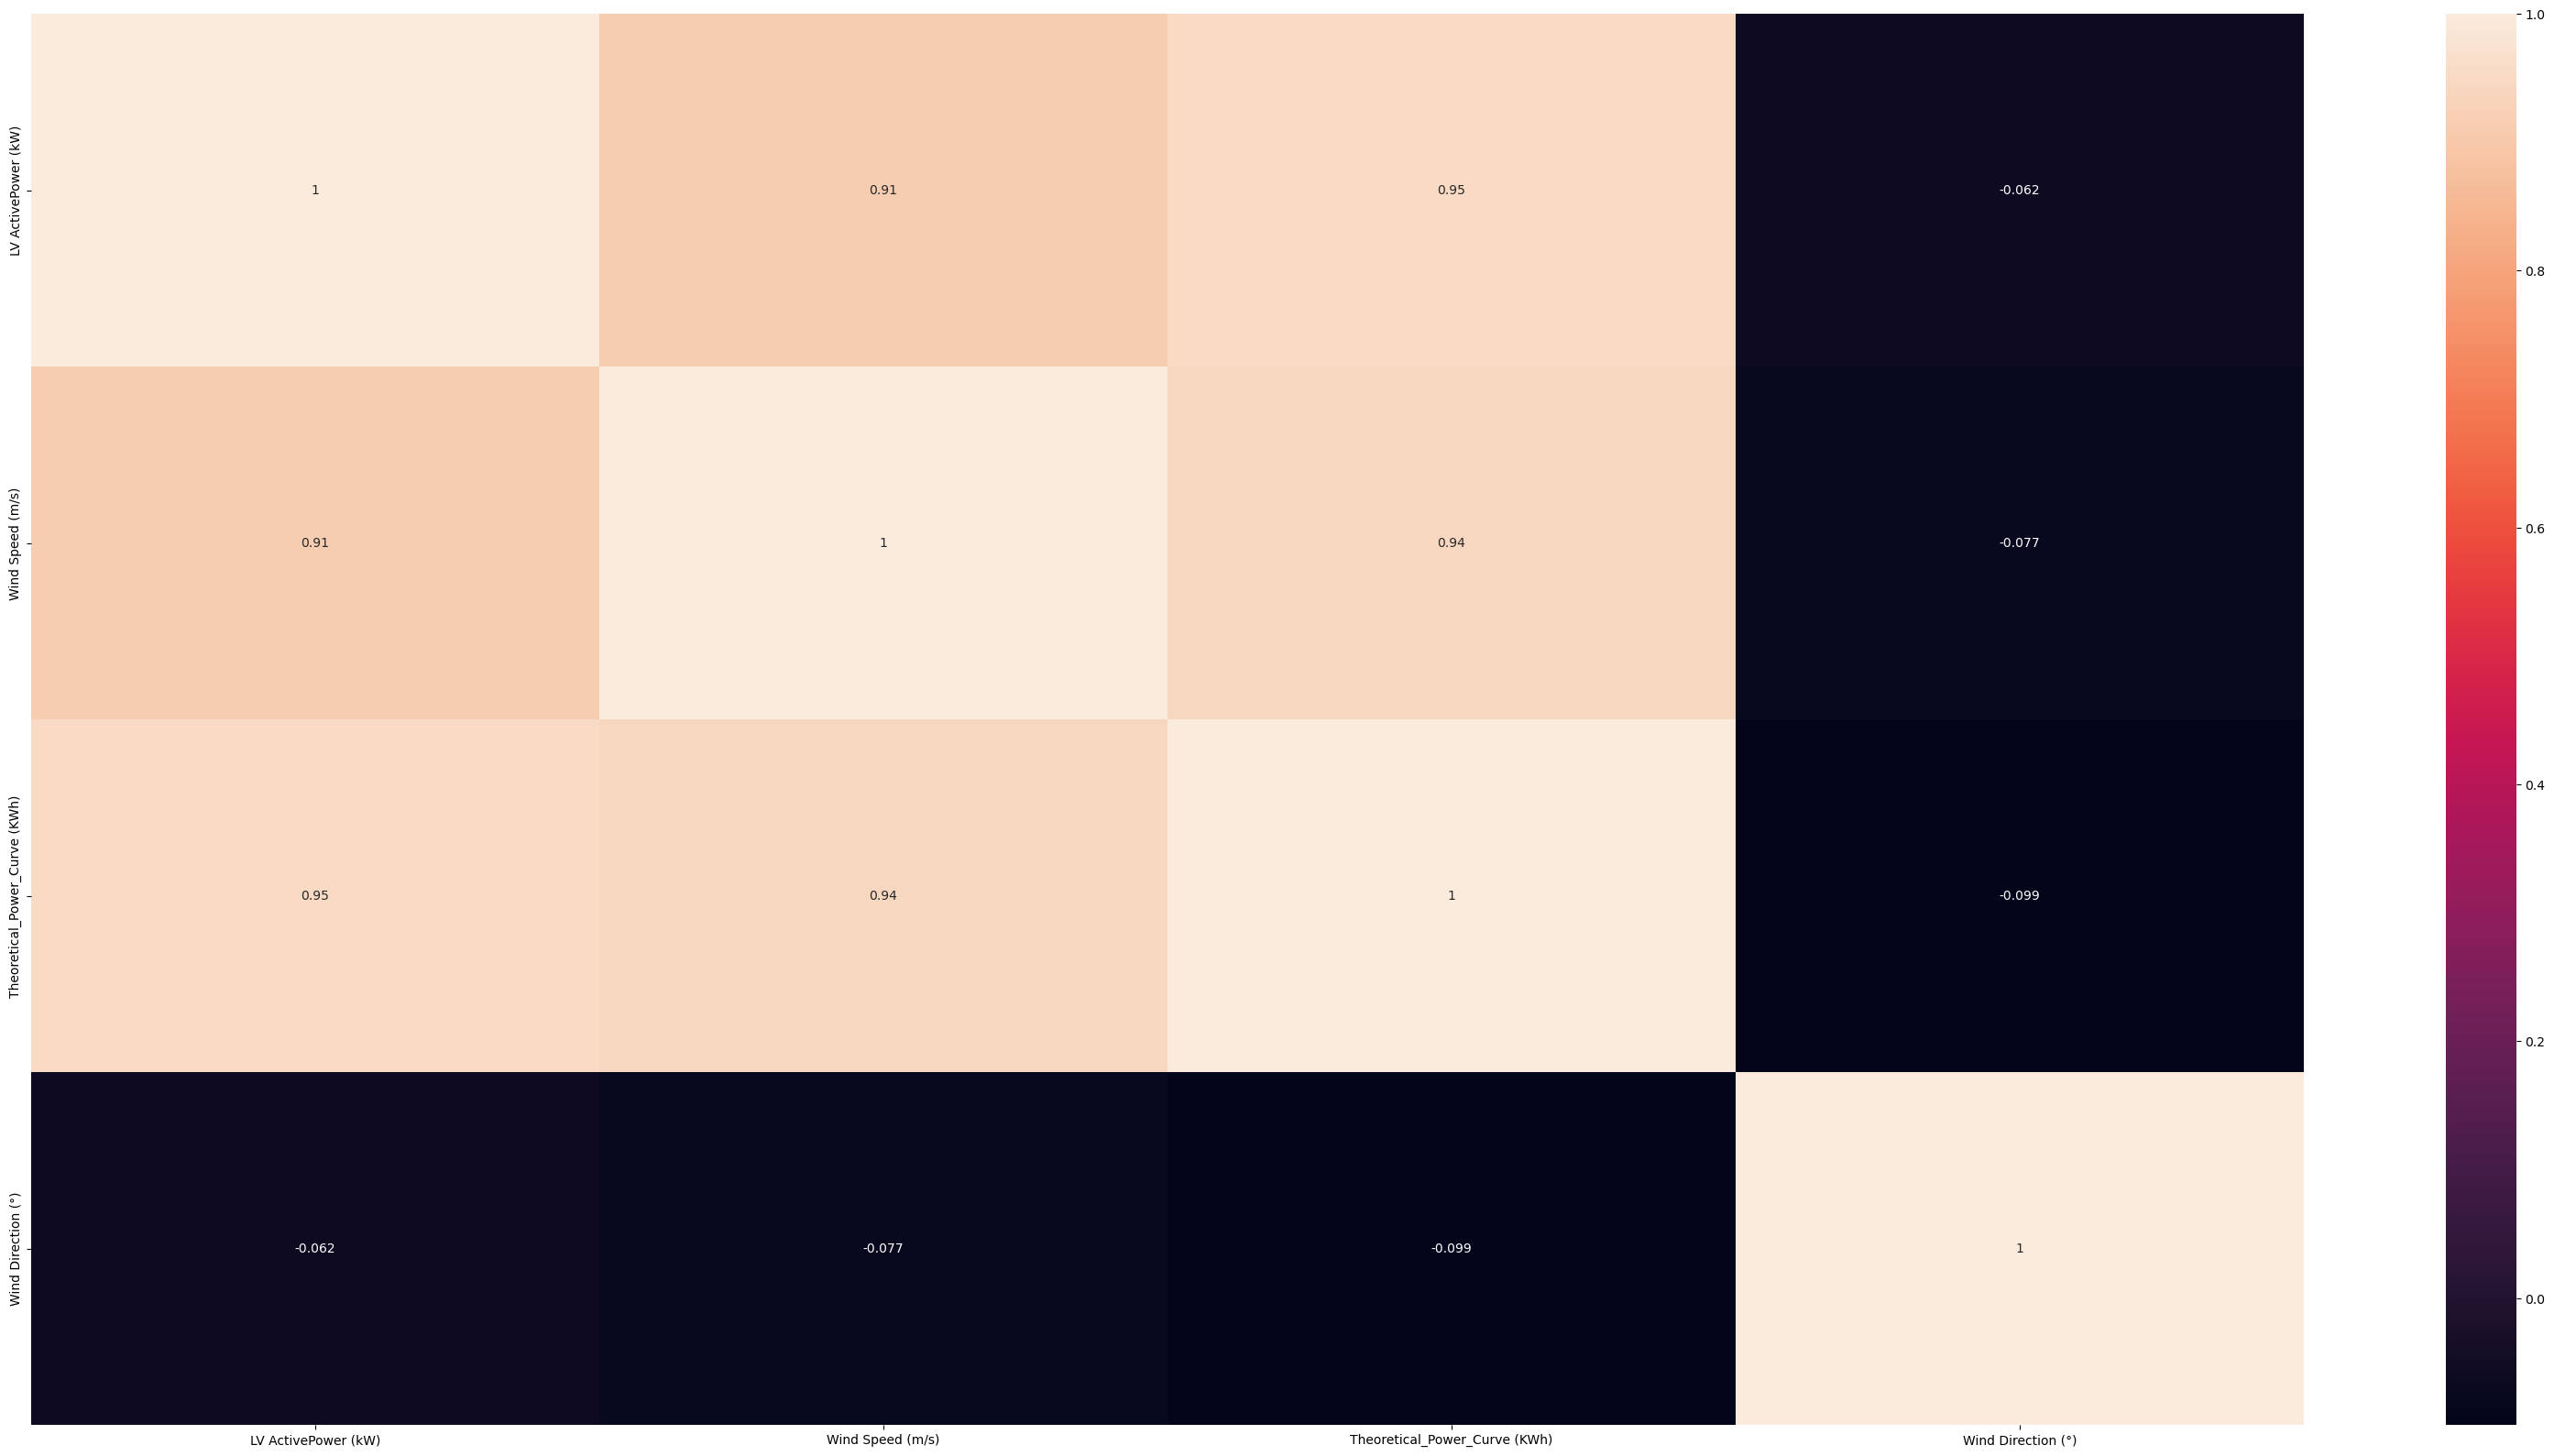

In [84]:
# Make a heatmap of the data 
plt.figure(figsize=(40, 20))

# Create an annotated heatmap of correlations
sns.heatmap(data2.corr(), annot=True)

# Show the plot
plt.show()

There is a relatively strong correlation between the Wind Speed (m/s)  and LV ActivePower (kW) variables respectively.

In [85]:
data2.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

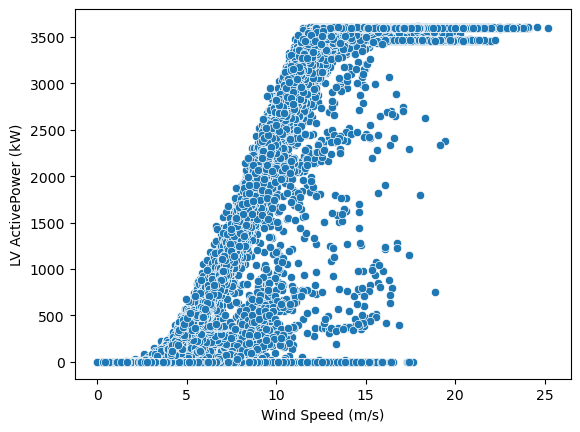

In [90]:
sns.scatterplot(x="Wind Speed (m/s)", y="LV ActivePower (kW)", data=data2)

plt.show()

In [87]:
data2["Wind Speed (m/s)"].corr(data2["LV ActivePower (kW)"])

0.9126777247023521

In [89]:
# We can see a positive correlation, and quite a steep one

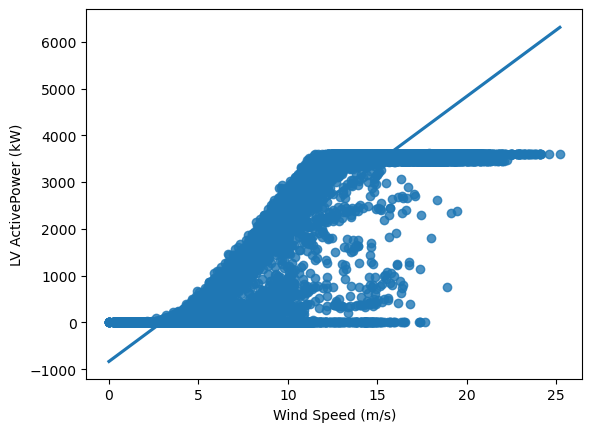

In [91]:
sns.regplot(x="Wind Speed (m/s)", y="LV ActivePower (kW)", data=data2)

plt.show()

In [93]:
data2.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


In [98]:
# Subsetting our data into our dependent and independent variables.
X = data2[["Wind Speed (m/s)"]]
y = data2[["LV ActivePower (kW)"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [99]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37854, 1) (37854, 1)
(12619, 1) (12619, 1)


In [100]:
rModel = linear_model.LinearRegression()

In [101]:
# We now want to train the model on our test data.
rModel.fit(X_train, y_train)

LinearRegression()

In [102]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.8334815395576392


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 83.3% of the variation from the mean.

In [103]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

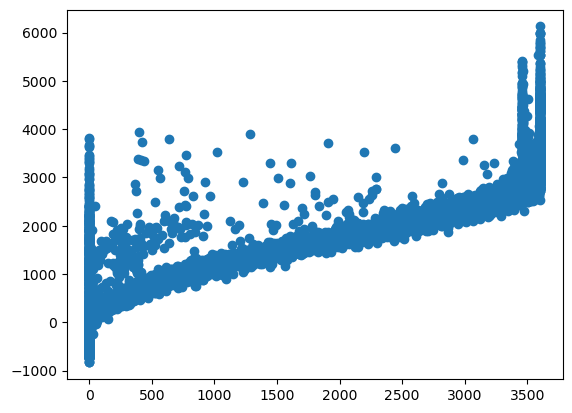

In [105]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred)
plt.show()

In [139]:
data2.head(2)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113


The above scatterplot represents how well the predictions match the actual results.

Along the x-axis, we have the actual LV ActivePower (kW) , and along the y-axis we have the predicted value for the LV ActivePower (kW).

#### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [108]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = data2[["Wind Speed (m/s)"]]

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(X)

In [109]:
# The rest of the preparation is as before.
y = data2[["LV ActivePower (kW)"]]

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [110]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [111]:
# Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     LV ActivePower (kW)   R-squared:                       0.833
Model:                             OLS   Adj. R-squared:                  0.833
Method:                  Least Squares   F-statistic:                 1.895e+05
Date:                 Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                         13:58:19   Log-Likelihood:            -2.9158e+05
No. Observations:                37854   AIC:                         5.832e+05
Df Residuals:                    37852   BIC:                         5.832e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -831.4965      5.627   -147.766      0.000    -842.526    -820.467
Wind Speed (m/s)   283.0349      0.650    435.272      0.000     281.760     284.309
==============================================================================
Omnibus:                    12575.406   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68032.282
Skew:                          -1.506   Prob(JB):                         0.00
Kurtosis:                       8.837   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the R-squared score is 0.833, the same as what it was with the previous model. This makes perfect sense, right? It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

In [112]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)

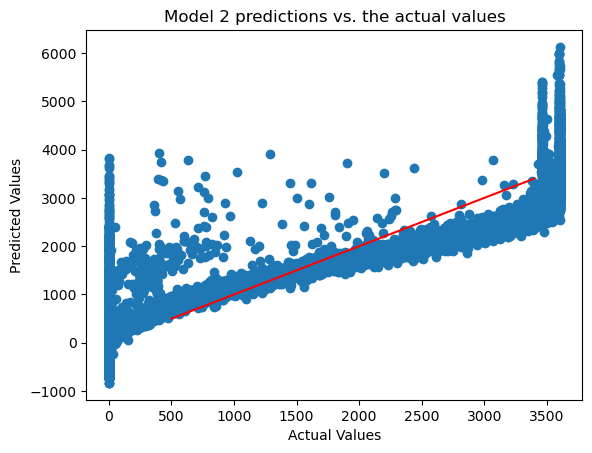

In [117]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

plt.plot([x for x in range(500, 3500, 100)], [x for x in range(500, 3500,100)], color='red')

plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do.

To get a better predictive model, we should use more than one variable.

In [118]:
data2.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


In [128]:
X = data2.drop(["LV ActivePower (kW)"],axis=1)
X = sm.add_constant(X)
y = data2[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [129]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel3 = sm.OLS(y_train, X_train)

# Fit the model
rModel3_results = rModel3.fit()

In [130]:
# Evaluate the model
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     LV ActivePower (kW)   R-squared:                       0.905
Model:                             OLS   Adj. R-squared:                  0.905
Method:                  Least Squares   F-statistic:                 1.208e+05
Date:                 Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                         14:33:59   Log-Likelihood:            -2.8086e+05
No. Observations:                37854   AIC:                         5.617e+05
Df Residuals:                    37850   BIC:                         5.618e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -248.0487      6.303    -39.357      0.000    -260.402    -235.695
Wind Speed (m/s)                 43.6879      1.495     29.222      0.000      40.758      46.618
Theoretical_Power_Curve (KWh)     0.7864      0.005    169.658      0.000       0.777       0.796
Wind Direction (°)                0.4236      0.022     18.951      0.000       0.380       0.467
==============================================================================
Omnibus:                    36407.500   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1443873.560
Skew:                          -4.835   Prob(JB):                         0.00
Kurtosis:                      31.670   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score increased. - our first model predicted  around 83% of the variation, but now we are predicting 90%!

In [131]:
# Use our new model to make predictions
y_pred = rModel3_results.predict(X_test)

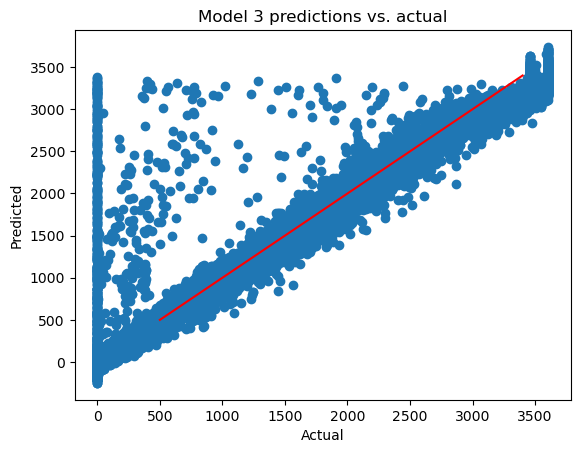

In [132]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(500, 3500, 100)], [x for x in range(500, 3500,100)], color='red')

# Label it nicely
plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line.

We can check another metric as well - the RMSE (Root Mean Squared Error).

#### 3e. Making a Linear Regression model: our fourth model: avoiding wind direction

In [134]:
data2.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [135]:
X = data2[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)']]
X = sm.add_constant(X)
y = data2[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [136]:
# Create the model
rModel4 = sm.OLS(y_train, X_train)

# Fit the model
rModel4_results = rModel4.fit()

In [137]:
# Use our new model to make predictions
y_pred = rModel4_results.predict(X_test)

In [138]:
rModel4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     LV ActivePower (kW)   R-squared:                       0.905
Model:                             OLS   Adj. R-squared:                  0.905
Method:                  Least Squares   F-statistic:                 1.794e+05
Date:                 Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                         15:03:47   Log-Likelihood:            -2.8104e+05
No. Observations:                37854   AIC:                         5.621e+05
Df Residuals:                    37851   BIC:                         5.621e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -195.9709      5.699    -34.389      0.000    -207.140    -184.801
Wind Speed (m/s)                 45.0762      1.500     30.045      0.000      42.136      48.017
Theoretical_Power_Curve (KWh)     0.7797      0.005    167.905      0.000       0.771       0.789
==============================================================================
Omnibus:                    36294.324   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1410857.817
Skew:                          -4.819   Prob(JB):                         0.00
Kurtosis:                      31.313   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wind Direction data does not affect the R-squared

### Conclusions

Here's one conclusion that seems right. While our most predictively powerful model was rModel3, this model had explanatory variables that were correlated with one another